<a href="https://colab.research.google.com/github/jamiemcgarry/Using_Frame_Semantic_Transfomer_on_historical_texts/blob/main/Qualitative_reading_and_bar_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook allows you to read the data from the orgial .pkl files. Its use is for qualitative reading. I also show how I produced the bar graphs in my results section of the essay.

In [1]:
!pip install frame-semantic-transformer

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [8]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle

file_path = '/content/drive/My Drive/Final_Paine.pkl'

with open(file_path, 'rb') as file:
    serialized_result = file.read()

Final_Paine = pickle.loads(serialized_result)

In [4]:
import pickle

file_path = '/content/drive/My Drive/Final_Burke.pkl'

with open(file_path, 'rb') as file:
    serialized_result = file.read()

Final_Burke = pickle.loads(serialized_result)

Replace the two cells above with the code that imports the .pkl files of Burke and Paine from wherever you have them saved

In [5]:
for i in Final_Burke:
  for frame in i.frames:
    if frame.name == 'Body_parts':
      print(f"Results found in: {i.sentence}")
      print(f"FRAME: {frame.name}")
      for element in frame.frame_elements:
        print(f"{element.name}: {element.text}")
    else:
       continue

Results found in: but liberty, when men act in bodies, is  power .(B_1)
FRAME: Body_parts
Body_part: bodies
Results found in: and how does the settlement of the crown in the brunswick line, derived from james the first, come to legalize our monarchy rather than that of any of the neighboring countries?(B_1)
FRAME: Body_parts
Body_part: crown
Results found in: these gentlemen of the old jewry, in all their reasonings on the revolution of 1688, have a revolution which happened in england about forty years before, and the late french revolution, so much before their eyes and in their hearts, that they are constantly confounding all the three together.(B_1)
FRAME: Body_parts
Possessor: their
Body_part: eyes
Results found in: it is called "an act for declaring the rights and liberties of the subject, and for  settling  the  succession  of the crown."(B_1)
FRAME: Body_parts
Body_part: crown
Results found in: it is curious to observe with what address this temporary solution of continuity is 

In [6]:
for i in Final_Paine:
  for frame in i.frames:
    if frame.name == 'System':
      print(f"Results found in: {i.sentence}")
      print(f"FRAME: {frame.name}")
      for element in frame.frame_elements:
        print(f"{element.name}: {element.text}")
    else:
       continue

Results found in: as mr. burke occasionally applies the poison drawn from his horrid principles, not only to the english nation, but to the french revolution and the national assembly, and charges that august, illuminated and illuminating body of men with the epithet of usurpers, i shall, sans ceremonie, place another system of principles in opposition to his.  (P_1)
FRAME: System
Complex: system
Component_entities: of principles
Results found in: but all those writings and many others had their weight; and by the different manner in which they treated the subject of government, montesquieu by his judgment and knowledge of laws, voltaire by his wit, rousseau and raynal by their animation, and quesnay and turgot by their moral maxims and systems of economy, readers of every class met with something to their taste, and a spirit of political inquiry began to diffuse itself through the nation at the time the dispute between england and the then colonies of america broke out.  (P_1)
FRAME: 

for either of these two cells just replace the 3rd line where it holds the frame.name with whichever frame you are interested in

In [11]:
frame_lemmas_Burke = []

for i in Final_Burke:
  for frame in i.frames:
    if frame.name == 'System':
      for element in frame.frame_elements:
        tokens = word_tokenize(element.text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
        frame_lemmas_Burke.extend(lemmatized_words)
    else:
      continue

frame_lemmas_Paine = []

for i in Final_Paine:
  for frame in i.frames:
    if frame.name == 'System':
      for element in frame.frame_elements:
        tokens = word_tokenize(element.text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
        frame_lemmas_Paine.extend(lemmatized_words)
    else:
      continue

In [12]:
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')

english_stopwords = set(stopwords.words('english'))
english_punctuation = set(punctuation)

cleaned_lemmas_Burke = [lemma for lemma in frame_lemmas_Burke if lemma.lower() not in english_stopwords and lemma not in english_punctuation]
cleaned_lemmas_Paine = [lemma for lemma in frame_lemmas_Paine if lemma.lower() not in english_stopwords and lemma not in english_punctuation]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


What this code does it take every word found in the Frame Elements sections for the frame 'System' in Final_Burke and Final_Paine and append it to a list for each author. I then remove every stopword (words like 'the', 'it', 'and' etc.) and all puncaution. This gives me all types of words in there texts that came under the frame 'System'.

In [13]:
system_words = ['economy', 'monarchical', 'hereditary', 'representative', 'representation', 'monarchy', 'aristocracy', 'aristocratical', 'landed', 'christian', 'politcal', 'republican', 'municiplaity', 'executory', 'constituion', 'government', 'republic', 'instituion', 'politics', 'religon', 'property', 'anarchy', 'military']

These words are a list of words relating to institutions or status groups found within their texts. I gathered these words by first finding all words that relate to 'System' and then filtering out those that don't relate to institutions.

In [21]:
import pandas as pd
from collections import Counter

lemmas_freq_dic_Paine = dict(Counter(cleaned_lemmas_Paine))


final_lemmas_freq_dic_Paine = {}
for i in lemmas_freq_dic_Paine.keys():
  if i in system_words:
    final_lemmas_freq_dic_Paine[i] = lemmas_freq_dic_Paine[i]



In [20]:
titles = ['lemmas', 'frequency']

Lemma_dataframe_Paine = pd.DataFrame(data=final_lemmas_freq_dic_Paine.items(), columns=titles)



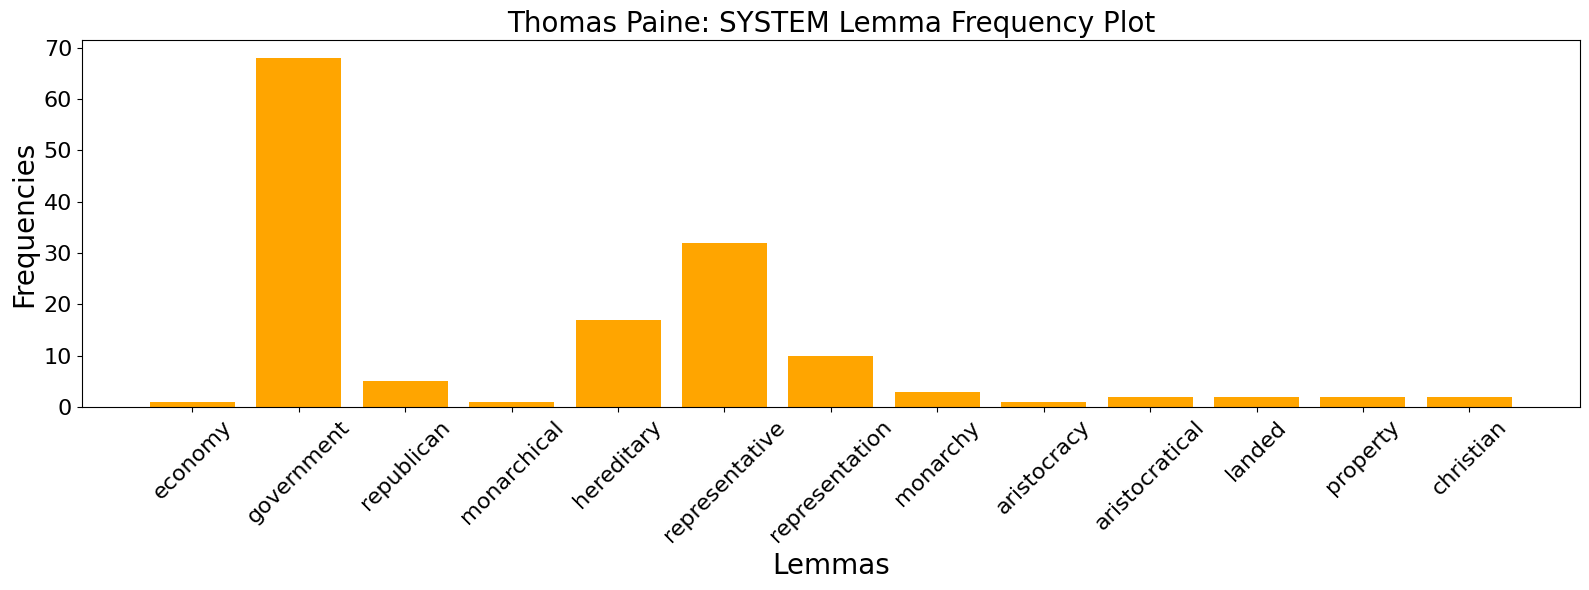

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.bar(Lemma_dataframe_Paine['lemmas'], Lemma_dataframe_Paine['frequency'], color='orange')
plt.xlabel('Lemmas', fontsize = 20)
plt.ylabel('Frequencies', fontsize = 20)
plt.title('Thomas Paine: SYSTEM Lemma Frequency Plot', fontsize = 20)
plt.xticks(rotation = 45, fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.show()

Therefore I am able to then display the usage of certain words within certain frames. In my paper I use this example in the results section, and the same process applies to Edmund Burke. I also do this style of analysis with the 'Aggregate' frame in that paper and the same process applies there also